Import Data

In [88]:
# Importing os for getting path names for data
import os
# Importing pandas 
import pandas as pd

In [89]:
data_path = os.path.join('data','zippedData')
files = os.listdir(data_path)

In [90]:
import_paths = [os.path.join(data_path,file) for file in files]

In [91]:
import_paths

['data/zippedData/imdb.title.crew.csv.gz',
 'data/zippedData/tmdb.movies.csv.gz',
 'data/zippedData/imdb.title.akas.csv.gz',
 'data/zippedData/imdb.title.ratings.csv.gz',
 'data/zippedData/imdb.name.basics.csv.gz',
 'data/zippedData/rt.reviews.tsv.gz',
 'data/zippedData/imdb.title.basics.csv.gz',
 'data/zippedData/rt.movie_info.tsv.gz',
 'data/zippedData/tn.movie_budgets.csv.gz',
 'data/zippedData/bom.movie_gross.csv.gz',
 'data/zippedData/imdb.title.principals.csv.gz']

In [92]:
data = {}
for path in import_paths:
    try:
        df = pd.read_csv(path) #this will fail on the .tsv
    except:
        df = pd.read_csv(path,delimiter='\t', encoding='unicode_escape')
    data[path.split('/')[-1]] = df

In [6]:
len(data)

11

In [7]:
data['bom.movie_gross.csv.gz'].head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
data['tmdb.movies.csv.gz'].head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
file_rename_list = ['writer_director', #imdb.title.crew.csv.gz
                   'movie_info',#tmdb.movies.csv.gz
                   'global_title',#imdb.title.akas.csv.gz
                   'rating_with_votes',#imdb.title.ratings.csv.gz'
                   'worked_in_film',#imdb.name.basics.csv.gz
                   'rotten_reviews',#rt.reviews.tsv.gz
                   'movie_basic_info',#imdb.title.basics.csv.gz
                   'rotten_movie_info',#rt.movie_info.tsv.gz
                   'budget_tn',#tn.movie_budgets.csv.gz
                   'boxoffice_bom',#bom.movie_gross.csv.gz
                   'character_title',#imdb.title.principals.csv.gz
                   ]

In [10]:
#getting movie title and genre from the df
df_test_info = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]

In [11]:
#changing column title to be the same with other df
df_test_info.rename(columns={'original_title':'title'},inplace=True) #df.rename(columns={"A": "a", "B": "c"})

In [12]:
#getting the title and gross into sep df
df_test_box = data['bom.movie_gross.csv.gz'].loc[:,['title','domestic_gross','foreign_gross']]

In [13]:
#merging the movie info with the gross income info
df_test_box_info = df_test_box.merge(df_test_info,how='left',on='title') 

In [14]:
#getting rid of commas in the foreign gross column
df_test_box_info.foreign_gross = df_test_box_info.foreign_gross.str.replace(',','') 

In [15]:
df_test_box[(df_test_box.title == "Marvel's The Avengers")]

,title,domestic_gross,foreign_gross
727,Marvel's The Avengers,623400000.0,895500000


In [16]:
#changing foreign gross from string to float
df_test_box_info.foreign_gross = df_test_box_info.foreign_gross.astype(float)

In [17]:
# making new column of total gross
#dom_gross = df_test_box_info['domestic_gross']
df_test_box_info['total_gross'] = df_test_box_info['domestic_gross'] + df_test_box_info['foreign_gross']

In [18]:
df_test_box.iloc[750:752]

,title,domestic_gross,foreign_gross
750,Journey 2: The Mysterious Island,103900000.0,231400000
751,The Expendables 2,85000000.0,229900000


In [19]:
df_test_box_info = df_test_box_info.sort_values(by='total_gross',ascending=False)

In [20]:
df_test_box_info.drop_duplicates(subset='title',inplace = True)

In [21]:
genre_id_to_string = {28:'action',
                      16:'animated',
                      99:'documentary',
                      18:'drama',
                      10751:'family',
                      14:'fantasy',
                      36:'history',
                      35:'comedy',
                      10752:'war',
                      80:'crime',
                      10402:'music',
                      9648:'mystery',
                      10749:'romance',
                      878:'sci-fi',
                      27:'horror',
                      10770:'TV-movie',
                      53:'thriller',
                      37:'western',
                      12:'adventure'}

In [22]:
df_test_box_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 751 to 3722
Data columns (total 5 columns):
title             3386 non-null object
domestic_gross    3358 non-null float64
foreign_gross     2037 non-null float64
genre_ids         1944 non-null object
total_gross       2009 non-null float64
dtypes: float64(3), object(2)
memory usage: 158.7+ KB


In [23]:
df_test_box_info.dropna(subset=['genre_ids'],inplace=True)

In [24]:
def convert_id_to_name(id_list):
    id_list = id_list[1:-1].replace(',','').split()
    for id in enumerate(id_list):
        id_list[id[0]] = genre_id_to_string[int(id[1])]
    return(id_list)


In [25]:
df_test_box_info.genre_ids = df_test_box_info.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

In [26]:
df_test_box_info.dropna(subset=['total_gross'],inplace=True)

In [27]:
df_test_box_info.head()

,title,domestic_gross,foreign_gross,genre_ids,total_gross
1957,Avengers: Age of Ultron,459000000.0,946400000.0,"[action, adventure, sci-fi]",1.405400e+09
3393,Black Panther,700100000.0,646900000.0,"[action, adventure, fantasy, sci-fi]",1.347000e+09
2999,Star Wars: The Last Jedi,620200000.0,712400000.0,"[fantasy, adventure, sci-fi, action]",1.332600e+09
3394,Jurassic World: Fallen Kingdom,417700000.0,891800000.0,"[action, adventure, sci-fi]",1.309500e+09
1171,Frozen,400700000.0,875700000.0,[thriller],1.276400e+09


In [28]:
counter_dict = {}
for item in df_test_box_info.iterrows():
    ids = list(item[1])[-2]
    money = list(item[1])[-1]
    if ids != 'nan':
        for id in ids:
            if id in counter_dict.keys():
                counter_dict[id] += money
            else:
                counter_dict[id] = money

In [29]:
counter_dict

{'action': 94169450787.5,
 'adventure': 95679383915.5,
 'sci-fi': 49346115550.0,
 'fantasy': 44295388300.1,
 'thriller': 38978372487.4,
 'animated': 36049389497.0,
 'family': 43835199297.0,
 'comedy': 68135406092.0,
 'crime': 17430091672.0,
 'drama': 49062271592.0,
 'music': 3545061700.0,
 'war': 4417459600.0,
 'romance': 15252099097.0,
 'horror': 11636906000.0,
 'mystery': 9312085199.0,
 'western': 2330533100.0,
 'history': 4461201000.0,
 'documentary': 742670399.0,
 'TV-movie': 19100000.0}

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 19 artists>

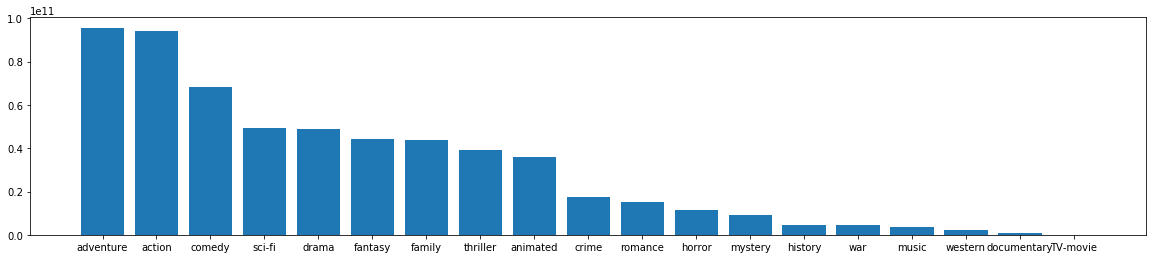

In [31]:
x = []
y = []
for item in sorted(counter_dict, key=counter_dict.get, reverse=True):
    x.append(item)
    y.append(counter_dict[item])
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y)

In [32]:
# for key, new_key in zip(data.keys(), file_rename_list):
#     data[new_key] = data.pop(key)

In [33]:
# data.keys()

Changing the list of genre ids to match the genres

In [93]:
data['tmdb.movies.csv.gz']['genre_ids'] = data['tmdb.movies.csv.gz']['genre_ids'].apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

Merging the imbd title basics dataset to the title ratings dataset on an outer join on the title id variable tconst. I did this, to get the movie titles for the tconst variable. If I am going to merge with the tmdb dataset, I can only do that on the movie titles and not on the ids since, the two source use different movie ids.

In [94]:
imdb_movie = data['imdb.title.basics.csv.gz'].merge(data['imdb.title.ratings.csv.gz'], how = 'outer', on = 'tconst')

In [36]:
imdb_movie.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Merging the tmdb and the imbd datasets to compile movie ratings information and calling it 'movie_ratings_info'

In [95]:
movie_ratings_info = data['tmdb.movies.csv.gz'].merge(imdb_movie, how = 'outer', on = 'original_title')

In [38]:
movie_ratings_info.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0.0,"[adventure, fantasy, family]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010.0,146.0,"Adventure,Fantasy,Mystery",7.7,425530.0
1,1.0,"[fantasy, adventure, animated, family]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,tt0892769,How to Train Your Dragon,2010.0,98.0,"Action,Adventure,Animation",8.1,611299.0


Dropping columns not interested in using

In [96]:
movie_ratings_info.drop(columns = ['Unnamed: 0','id', 'popularity', 'tconst', 'start_year','primary_title', 'title', 'genres'], axis = 1, inplace = True)

In [40]:
movie_ratings_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160208 entries, 0 to 160207
Data columns (total 9 columns):
genre_ids            31925 non-null object
original_language    31925 non-null object
original_title       160187 non-null object
release_date         31925 non-null object
vote_average         31925 non-null float64
vote_count           31925 non-null float64
runtime_minutes      117246 non-null float64
averagerating        76248 non-null float64
numvotes             76248 non-null float64
dtypes: float64(5), object(4)
memory usage: 12.2+ MB


Columns I am interested in are the ratings or votes columns and the number of vote and the vote count columns.
I will check on the size of the null values present in each of the variables and rely on the variable with lower number of null values, in each context.

In [97]:
movie_ratings_info['numvotes'].isna().sum()

83960

My goal is to merge the two ratings columns into one as where the weighted average of the two will fill as values. Since one of the ratings columns has more NaNs than the other, and a weighted average on them will throw off the meaning of the final number, I use the where method on the averagerating column. The condition will be such that if the averagerating column has a value greater than then no changes are made, whereas if the condition is not met, the value is replaced with the value in the vote_average column.

In [98]:
movie_ratings_info['averagerating'].where(movie_ratings_info['averagerating'] > 0, other = movie_ratings_info['vote_average'], inplace = True)

Similarly, my goal with the number of votes columns; 'vote_count' and 'numvotes' is also to combine the two as a sum of the two, to fill as values. The new column will be called 'number_votes'.
And, the combined ratings column will be called 'average_rating'.

In [99]:
movie_ratings_info['averagerating'].isna().sum()

69926

In [100]:
movie_ratings_info['average_rating'] = (movie_ratings_info['averagerating'] + movie_ratings_info['vote_average'])/2

In [101]:
movie_ratings_info['number_votes'] = (movie_ratings_info['numvotes'] + movie_ratings_info['vote_count'])

In [46]:
movie_ratings_info.head()

,genre_ids,original_language,original_title,release_date,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
0,"[adventure, fantasy, family]",en,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,7.7,10788.0,146.0,7.7,425530.0,7.7,436318.0
1,"[fantasy, adventure, animated, family]",en,How to Train Your Dragon,2010-03-26,7.7,7610.0,98.0,8.1,611299.0,7.9,618909.0
2,"[adventure, action, sci-fi]",en,Iron Man 2,2010-05-07,6.8,12368.0,124.0,7.0,657690.0,6.9,670058.0
3,"[animated, comedy, family]",en,Toy Story,1995-11-22,7.9,10174.0,NaN,7.9,NaN,7.9,NaN
4,"[animated, comedy, family]",en,Toy Story,1995-11-22,7.9,10174.0,NaN,7.9,NaN,7.9,NaN


In [102]:
movie_ratings_info['average_rating'].isna().sum()

128283

In [103]:
movie_ratings_info['number_votes'].isna().sum()

142317

In [104]:
movie_ratings_info.dropna(subset = ['number_votes'], inplace = True)

In [105]:
movie_ratings_info.drop_duplicates(subset='original_title', inplace = True)

In [106]:
movie_ratings_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13801 entries, 0 to 31924
Data columns (total 11 columns):
genre_ids            13801 non-null object
original_language    13801 non-null object
original_title       13801 non-null object
release_date         13801 non-null object
vote_average         13801 non-null float64
vote_count           13801 non-null float64
runtime_minutes      13549 non-null float64
averagerating        13801 non-null float64
numvotes             13801 non-null float64
average_rating       13801 non-null float64
number_votes         13801 non-null float64
dtypes: float64(7), object(4)
memory usage: 1.3+ MB


In [52]:
movie_ratings_info.describe()

,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
count,13801.000000,13801.000000,13549.000000,13801.000000,1.380100e+04,13801.000000,1.380100e+04
mean,5.740809,274.417144,93.519743,5.848446,1.578894e+04,5.794627,1.606335e+04
std,1.735708,1129.310668,18.210607,1.413375,6.593525e+04,1.392424,6.698607e+04
min,0.000000,1.000000,9.000000,1.100000,5.000000e+00,0.800000,6.000000e+00
25%,4.900000,2.000000,84.000000,4.900000,1.090000e+02,4.900000,1.150000e+02
50%,5.900000,8.000000,91.000000,6.000000,4.480000e+02,5.900000,4.650000e+02
75%,6.800000,51.000000,101.000000,6.900000,3.065000e+03,6.750000,3.136000e+03
max,10.000000,22186.000000,724.000000,9.800000,1.841066e+06,9.900000,1.863252e+06


In [53]:
movie_ratings_info['average_rating'].median()

5.9

In [54]:
movie_ratings_info['average_rating'].mode()

0    6.1
dtype: float64

In [260]:
movie_ratings_info.corr()

,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
vote_average,1.000000,0.134382,0.129355,0.559485,0.134580,0.907220,0.134735
vote_count,0.134382,1.000000,0.279319,0.166001,0.929352,0.168005,0.931632
runtime_minutes,0.129355,0.279319,1.000000,0.136667,0.292739,0.149748,0.292854
averagerating,0.559485,0.166001,0.136667,1.000000,0.181215,0.856233,0.181171
numvotes,0.134580,0.929352,0.292739,0.181215,1.000000,0.175850,0.999981
average_rating,0.907220,0.168005,0.149748,0.856233,0.175850,1.000000,0.175924
number_votes,0.134735,0.931632,0.292854,0.181171,0.999981,0.175924,1.000000


In [176]:
movie_ratings_info.sort_values(by = 'number_votes', ascending = False).head()

,genre_ids,original_language,original_title,release_date,vote_average,vote_count,runtime_minutes,averagerating,numvotes,average_rating,number_votes
5,"[action, sci-fi, adventure]",en,Inception,2010-07-16,8.3,22186.0,148.0,8.8,1841066.0,8.55,1863252.0
6976,"[action, crime, drama, thriller]",en,The Dark Knight Rises,2012-07-20,7.7,13933.0,164.0,8.4,1387769.0,8.05,1401702.0
14586,"[adventure, drama, sci-fi]",en,Interstellar,2014-11-05,8.2,18597.0,169.0,8.6,1299334.0,8.40,1317931.0
6983,"[drama, western]",en,Django Unchained,2012-12-25,8.0,15725.0,165.0,8.4,1211405.0,8.20,1227130.0
6970,"[sci-fi, action, adventure]",en,The Avengers,2012-05-04,7.6,19673.0,143.0,8.1,1183655.0,7.85,1203328.0


In [169]:
# ratings_more_than_5 = movie_ratings_info[movie_ratings_info['average_rating'] > 5]
# len(ratings_more_than_5)
# # use this for plotting on

In [146]:
# ratings_more_than_8 = movie_ratings_info[movie_ratings_info['average_rating'] > 8]  
# #                                          &  movie_ratings_info['number_votes']>50]
# len(ratings_more_than_8)
# ratings_over_8 = ratings_more_than_8[ratings_more_than_8['number_votes']>100]

In [170]:
# ratings_over_8.sort_values(by = 'number_votes')

Out of 13801 movies, 10081 0r 73% of the sample of movies had average ratings over 5 points whereas only 2627 or 20% of the sample of movies had average ratings over 8

In [172]:
# ratings_more_than_5['release_date'].dtype

In [171]:
# ratings_more_than_5.corr()

The correlation between the average_rating and number of votes is a very low positive. There is not significant effect on the average rating of a movie as more people voted. The ratings are reflective of how well liked a movie was by the people who watched it.

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

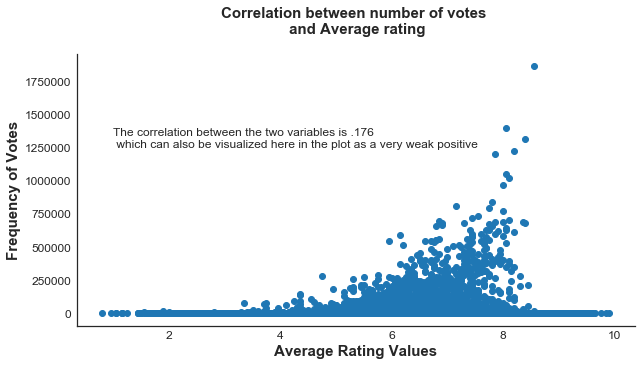

In [265]:
# Generating Figure
figure1, ax = plt.subplots(figsize = (10,5))
# Generating scatter plot to preview variable relationship
x = movie_ratings_info['average_rating']
y = movie_ratings_info['number_votes']
ax.scatter(x,y)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Set axes labels
ax.set_xlabel('Average Rating Values', fontsize = 15, weight = 'bold')
ax.set_ylabel('Frequency of Votes', fontsize = 15, weight = 'bold')
#adjusting tick parameter
ax.tick_params('both', labelsize = 12, pad = 5)
#setting figure title
ax.set_title('Correlation between number of votes \n and Average rating', pad = 20, fontsize = 15, weight = 'bold')

ax.text(1, 1250000, 'The correlation between the two variables is .176 \n which can also be visualized here in the plot as a very weak positive', fontsize =12)




plt.show();

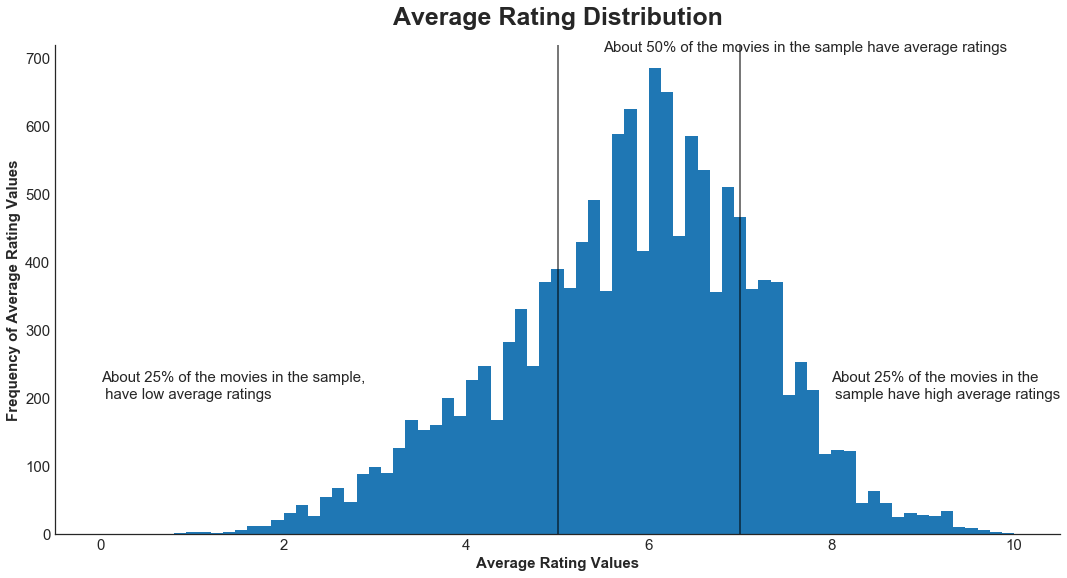

In [238]:
# Generate a figure with a single axis
figure2, ax = plt.subplots(figsize = (18, 9))
#Generate a histogram on the ax
x = movie_ratings_info['average_rating']
ax.hist(x, bins = 75, range = (0, 10))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Set axes labels
ax.set_xlabel('Average Rating Values', fontsize = 15, weight = 'bold')
ax.set_ylabel('Frequency of Average Rating Values', fontsize = 15, weight = 'bold')
#adjusting tick parameter
ax.tick_params('both', labelsize = 15, pad = 5)
#setting figure title
ax.set_title('Average Rating Distribution', pad = 20, fontsize = 25, weight = 'bold')

#adding vertical lines to create section of data
ax.axvline(5, color = 'black', alpha = 0.7)
ax.axvline(7, color = 'black', alpha = 0.7)

#Adding text
ax.text(0,  200, 'About 25% of the movies in the sample, \n have low average ratings', fontsize = 15)
ax.text(5.5, 710, 'About 50% of the movies in the sample have average ratings', fontsize = 15)
ax.text(8, 200, 'About 25% of the movies in the \n sample have high average ratings', fontsize = 15)

plt.show();

In [243]:
genres_list = genre_id_to_string.values()

genre_counter = {}
genre_counter = dict.fromkeys(genres_list)

for genre in genre_counter.keys():
    genre_counter[genre] =  0

In [244]:
# I want to create a genre counter to see how many times a genre appears in the group of movies with ratings higher than 8

for glist in movie_ratings_info['genre_ids']:
    for genre in glist:
        if genre in genre_counter.keys(): 
            genre_counter[genre] += 1
        
        

In [245]:
genre_counter

{'action': 1480,
 'animated': 340,
 'documentary': 2605,
 'drama': 4993,
 'family': 710,
 'fantasy': 512,
 'history': 330,
 'comedy': 2992,
 'war': 188,
 'crime': 906,
 'music': 412,
 'mystery': 696,
 'romance': 1264,
 'sci-fi': 921,
 'horror': 2358,
 'TV-movie': 114,
 'thriller': 2735,
 'western': 114,
 'adventure': 764}

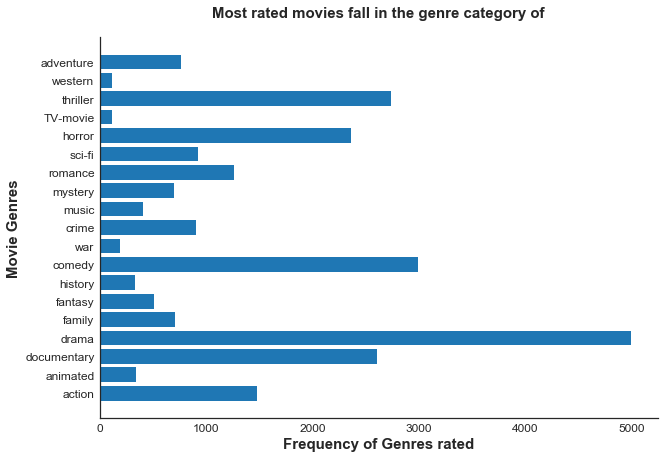

In [254]:
# Generating figure
figure, ax = plt.subplots(figsize = (10, 7))

# generating a horizontal bar plot on the ax
x = list(genre_counter.values())
y = list(genre_counter.keys())
ax.barh(y, x)

#Set axes labels
ax.set_xlabel('Frequency of Genres rated', fontsize = 15, weight = 'bold')
ax.set_ylabel('Movie Genres', fontsize = 15, weight = 'bold')
#adjusting tick parameter
ax.tick_params('both', labelsize = 12, pad = 5)
#setting figure title
ax.set_title('Most rated movies fall in the genre category of', pad = 20, fontsize = 15, weight = 'bold')
#Hiding top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show;